In [1]:
import numpy as np
import os 
import arviz as az
import pandas as pd
import math
import xarray as xr
import matplotlib.pyplot as plt
os.chdir("..")
import model_data as md
import waic as wc
os.getcwd()

'C:\\Users\\brett\\sparklyRGT\\Pystan'

In [2]:
os.chdir("WAIC")

In [3]:
waic_df = pd.read_excel("langdon_waic_values.xlsx")
waic_df = waic_df.rename(columns = {'Unnamed: 0': "subs"})
waic_df = waic_df.set_index('subs')
waic_df

,basic_waic,basic_waic_SE,basicstar_waic,basicstar_waic_SE,pscale_waic,pscale_waic_SE,pscalestar_waic,pscalestar_SE,pindep_waic,pindep_waic_SE,pindepstar_waic,pindepstar_waic_SE
subs,,,,,,,,,,,,
cued,-238386.520843,11.444801,-238910.429117,11.402445,-238978.529523,11.098161,-237727.924793,11.521083,-234979.202523,12.262771,-235138.346873,12.336943
classic,-190621.916967,12.056341,-190630.701104,12.465796,-188807.457847,12.613349,-189595.334956,12.615861,-186720.286446,12.768808,-187040.607631,12.711015


In [ ]:
subs = waic_df["Unnamed: 0"]
subs_list = list(subs)
subs_list
waic_df[["basic_waic", "basicstar_waic"]]
waic_df.iloc[[0]]

In [ ]:
loss_row = waic_df.iloc[[0]]
outcome_row = waic_df.iloc[[1]]
random_row = waic_df.iloc[[2]]
reverse_row = waic_df.iloc[[3]]
standard_row = waic_df.iloc[[4]]
uncued_row = waic_df.iloc[[5]]

In [ ]:
labels = subs_list
loss_waics = loss_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
outcome_waics = outcome_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
random_waics = random_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
reverse_waics = reverse_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
standard_waics = standard_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
uncued_waics = uncued_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]

loss_values = loss_waics.values[0].tolist()
outcome_values = outcome_waics.values[0].tolist()
random_values = random_waics.values[0].tolist()
reverse_values = reverse_waics.values[0].tolist()
standard_values = standard_waics.values[0].tolist()
uncued_values = uncued_waics.values[0].tolist()

In [ ]:
basic_waics = waic_df["basic_waic"].tolist()
basicstar_waics = waic_df["basicstar_waic"].tolist()
pscale_waics = waic_df["pscale_waic"].tolist()
pscalestar_waics = waic_df["pscalestar_waic"].tolist()
pindep_waics = waic_df["pindep_waic"].tolist()
pindepstar_waics = waic_df["pindepstar_waic"].tolist()

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, basic_waics, width, label='Loss')
rects2 = ax.bar(x + width/2, basicstar_waics, width, label='Outcome')
rects3 = ax.bar(x + 3*width/2, pscale_waics, width, label='Random')
rects4 = ax.bar(x + 5*width/2, pscalestar_waics, width, label='Reverse')
rects5 = ax.bar(x + 7*width/2, pindep_waics, width, label='Standard')
rects6 = ax.bar(x + 9*width/2, pindepstar_waics, width, label='Uncued')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

In [ ]:
df

In [4]:
waic_df_values = waic_df[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
waic_df_se = waic_df[["basic_waic_SE", "basicstar_waic_SE", "pscale_waic_SE", "pscalestar_SE", "pindep_waic_SE", "pindepstar_waic_SE"]]
waic_df_values = waic_df_values.transform(func = lambda x : x * -1)
# waic_df_se = waic_df_se.transform(func = lambda x : x * 10000)
waic_df_se

,basic_waic_SE,basicstar_waic_SE,pscale_waic_SE,pscalestar_SE,pindep_waic_SE,pindepstar_waic_SE
subs,,,,,,
cued,11.444801,11.402445,11.098161,11.521083,12.262771,12.336943
classic,12.056341,12.465796,12.613349,12.615861,12.768808,12.711015


In [6]:
waic_df_values

,basic_waic,basicstar_waic,pscale_waic,pscalestar_waic,pindep_waic,pindepstar_waic
subs,,,,,,
cued,238386.520843,238910.429117,238978.529523,237727.924793,234979.202523,235138.346873
classic,190621.916967,190630.701104,188807.457847,189595.334956,186720.286446,187040.607631


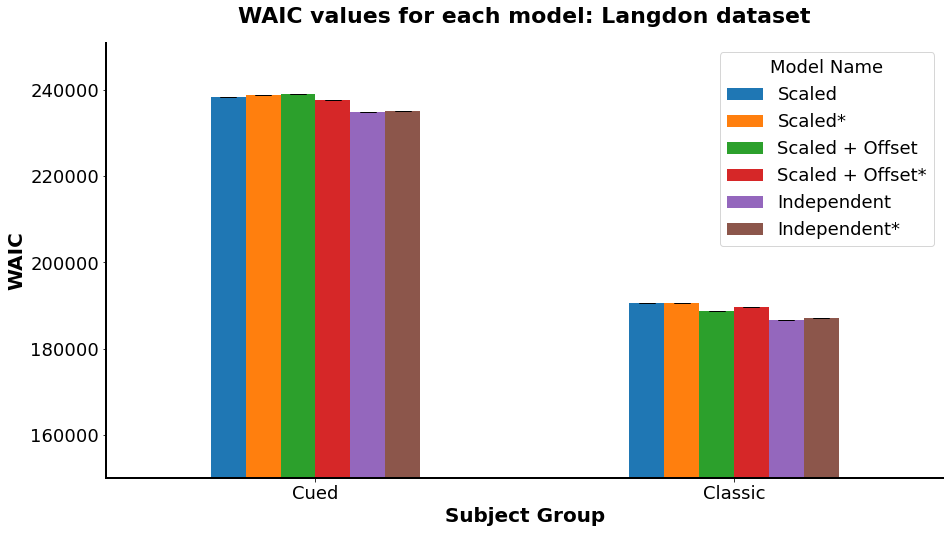

In [16]:
sub_groups = ["Cued","Classic"]
x_pos = np.arange(len(sub_groups))

ax = waic_df_values.plot.bar(rot = 0, 
                        capsize = 8,
                        yerr = waic_df_se.values.transpose(), 
                        figsize = (15,8))
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Subject Group', fontweight = 'bold', fontsize = 20)
ax.set_ylabel('WAIC', fontweight = 'bold', fontsize = 20)
ax.set_xticklabels(sub_groups)
ax.set_title("WAIC values for each model: Langdon dataset", 
             fontweight = 'bold',
             fontsize = 22, pad = 20)
ax.set_ylim(bottom = 150000)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.legend(["Scaled", "Scaled*", "Scaled + Offset", "Scaled + Offset*", "Independent", "Independent*"], title = "Model Name")


#plt.savefig('langdon_waic_graphic',facecolor = 'white')

In [ ]:
waic_df_values["minimum"] = waic_df_values.min(axis = 1)

In [ ]:
waic_df_values